#  <span style="color:#9400D3;text-decoration:overline;font-weight:bold"><u> AIML Module Project - RECOMMENDATIONS SYSTEMS</u></span>

# <span style="color:#9400D3">PROJECT BASED    

**DOMAIN:** Smartphone, Electronics

**CONTEXT:** India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by
smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has
made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they
are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the
right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system
based on individual consumer’s behaviour or choice.

**DATA DESCRIPTION:**
* author : name of the person who gave the rating
* country : country the person who gave the rating belongs to
* data : date of the rating
* domain: website from which the rating was taken from
* extract: rating content
* language: language in which the rating was given
* product: name of the product/mobile phone for which the rating was given
* score: average rating for the phone
* score_max: highest rating given for the phone
* source: source from where the rating was taken
*Data source:

**PROJECT OBJECTIVE:** We will build a recommendation system using popularity based and collaborative filtering methods to recommend
mobile phones to a user which are most popular and personalised respectively.

**Steps and tasks:**
1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.
 * Merge the provided CSVs into one data-frame.
 * Check a few observations and shape of the data-frame.
 * Round off scores to the nearest integers.
 * Check for missing values. Impute the missing values if there is any.
 * Check for duplicate values and remove them if there is any.
 * Keep only 1000000 data samples. Use random state=612.
 * Drop irrelevant features. Keep features like Author, Product, and Score.
 
 
2. Answer the following questions
 * Identify the most rated features.
 * Identify the users with most number of reviews.
 * Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.
 
 
3. Build a popularity based model and recommend top 5 mobile phones.


4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model.


5. Evaluate the collaborative model. Print RMSE value.


6. Predict score (average rating) for test users.


7. Report your findings and inferences.


8. Try and recommend top 5 products for test users.


9. Try cross validation techniques to get better results.


10. In what business scenario you should use popularity based Recommendation Systems ?


11. In what business scenario you should use CF based Recommendation Systems ?


12. What other possible methods can you think of which can further improve the recommendation for different users ?

### <span style="color:#9400D3">Importing Required Python Modules and Libraries
  Here we are importing all the Libraries and Modules that are needed for whole project in a single cell.

In [1]:
# Libraries for Basic Process 
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Pre-setting Plot Style
font={'size':15}
plt.rc('font', **font)
plt.rc('xtick',labelsize=12)    
plt.rc('ytick',labelsize=12)
sns.set_style({'xtick.bottom':True,'ytick.left':True,'text.color':'#9400D3',
               'axes.labelcolor': 'blue','patch.edgecolor': 'black'})

# Surprise Modules
from surprise import SVD, KNNWithMeans, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, cross_validate 

# Module to Suppress Warnings
from warnings import filterwarnings
filterwarnings('ignore') 

***
## <span style="color:#9400D3">1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.
   * We have 6 files to load.
   * If the file fails to load, then a quick check for file name is needed. Make sure that original file name matches with the name which is coded below.
   * The files are in CSV format, if format of original file changes then error in loading files will appear.

### <span style="color:#9400D3">* Merge the provided CSVs into one data-frame.

In [2]:
# Loading the files and creating dataframes
smd1 = pd.read_csv('phone_user_review_file_1.csv', encoding='ISO-8859-1')
smd2 = pd.read_csv('phone_user_review_file_2.csv', encoding='ISO-8859-1')
smd3 = pd.read_csv('phone_user_review_file_3.csv', encoding='ISO-8859-1')
smd4 = pd.read_csv('phone_user_review_file_4.csv', encoding='ISO-8859-1')
smd5 = pd.read_csv('phone_user_review_file_5.csv', encoding='ISO-8859-1')
smd6 = pd.read_csv('phone_user_review_file_6.csv', encoding='ISO-8859-1')

# Merging All the datasets into single data
SPdata = smd1.append([smd2,smd3,smd4,smd5,smd6])

# Re-setting the index of data
SPdata = SPdata.reset_index()

***
**Key Observations:-**
* All the files are loaded successfully.
* All datsets are merged to a single data.
***

### <span style="color:#9400D3">* Check a few observations and shape of the data-frame.

In [3]:
# Getting Shape and Size of final dataset
SP = SPdata.shape

# Displaying Final Dataset
print('\033[1mFinal Dataset consist:-\033[0m\n Number of Rows    =',SP[0],'\n Number of Columns =',SP[1])
display(SPdata.head(10))

Final Dataset consist:-
 Number of Rows    = 1415133 
 Number of Columns = 12


,index,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
5,5,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,I am the type of person who never would comple...,BDB76,Samsung Galaxy S8
6,6,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,The way this Samsung S8 phone operates is more...,KLC30306,Samsung Galaxy S8
7,7,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,I bought this phone very excited to use it. I ...,Mnhy,Samsung Galaxy S8
8,8,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,It is an extremely advanced and truly a Smart ...,Mr Alan,Samsung Galaxy S8
9,9,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,8.0,10.0,"Great phone with a PHENOMENAL Camera, not all ...",Raven Wolf Song,Samsung Galaxy S8


### Checking Data Types of Attributes

In [4]:
# Exploring dataset
print('\n\033[1mData Types of Each Attribute:-')
display(SPdata.dtypes.to_frame('Data Type'))


Data Types of Each Attribute:-


,Data Type
index,int64
phone_url,object
date,object
lang,object
country,object
source,object
domain,object
score,float64
score_max,float64
extract,object


***
**Key Observations:-**
* Dataset has 1415133 rows and 11 columns.
* Quiet a big data so far I saw😊
***

### <span style="color:#9400D3">* Round off scores to the nearest integers.

In [5]:
# Rounding off scores to the nearest integers
SPdata['score'] = round(SPdata['score'])

# Displaying dataset
display(SPdata.head())

,index,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


### <span style="color:#9400D3">* Check for missing values. Impute the missing values if there is any.

In [6]:
# Checking for Null Values
print('\n\033[1mNull Values in the Attributes:-')
display(SPdata.isnull().sum().to_frame('Null Values'))


Null Values in the Attributes:-


,Null Values
index,0
phone_url,0
date,0
lang,0
country,0
source,0
domain,0
score,63489
score_max,63489
extract,19361


***
**Key Observations:-**
* We have some missing values here.
* We need to impute the missing values.
***

## Imputing Missing Values

* We will impute all the missing values by most common values of the attribute.

In [7]:
# Imputing all the missing values by most common values of the attribute.
SPdata = SPdata.apply(lambda x: x.fillna(x.value_counts().index[0]))

print('\n\033[1mNull Values in the Attributes:-')
display(SPdata.isnull().sum().to_frame('Null Values'))


Null Values in the Attributes:-


,Null Values
index,0
phone_url,0
date,0
lang,0
country,0
source,0
domain,0
score,0
score_max,0
extract,0


***
**Key Observations:-**
* All the missing values are replaced by most common value of the attribute.
***

### <span style="color:#9400D3">* Check for duplicate values and remove them if there is any.

In [8]:
# Removing the 'index' column in-oder to check duplicate values
SPdata.drop(['index'],axis=1,inplace=True)

# Checking the duplicate values in the data
display(SPdata[SPdata.duplicated()])

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
342,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
343,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
371,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Tot nu toe in de eerste dagen weinig tot geen ...,Robin Winckens,Samsung Galaxy S8 Zwart
452,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Wat een huge scherm!,B Yapar,Samsung Galaxy S8 Zwart
3718,/cellphones/samsung-galaxy-s6-edgeplus/,10/4/2015,en,us,Amazon,amazon.com,10.0,10.0,"For readers, my opinions on this device (ATT 3...",FrozenCloud,"Samsung Galaxy S6 Edge+, Black 64GB (Verizon W..."
...,...,...,...,...,...,...,...,...,...,...,...
1398132,/cellphones/nokia-8850/,8/31/2010,ru,ru,Yandex,market.yandex.ru,10.0,10.0,"ÐÑÐ¾ÑÑÐ¾ Ð¾ÑÐ»Ð¸ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½, ...",Amazon Customer,Nokia 8850
1398134,/cellphones/nokia-8850/,6/25/2010,ru,ru,Yandex,market.yandex.ru,10.0,10.0,"ÐÐ° ÑÐ²Ð¾Ð¸ Ð´ÐµÐ½ÑÐ³Ð¸, 1000 Ð´Ð¾Ð»Ð»Ð°ÑÐ...",Amazon Customer,Nokia 8850
1410207,/cellphones/samsung-sgh-600/,4/30/2015,tr,tr,Cepworld,cepworld.com,10.0,10.0,varsa satan 05312614607,muhsin,Samsung (936) SGH-600
1411460,/cellphones/philips-genie-2000/,8/20/2000,it,it,Ciao,ciao.it,8.0,10.0,"Il Genie e' un buon telefono, scorrimente del ...",tonyblack,Philips Genie 2000


***
**Key Observations:-**
* OK so we have 6478 duplicate rows in our data.
* We will remove all the duplicate rows now.
***

## Removing Duplicate Rows

In [9]:
# Removing Duplicate Rows
SPdata.drop_duplicates(inplace=True)

# Checking the duplicate values in the data again
display(SPdata[SPdata.duplicated()])

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product


***
**Key Observations:-**
* We removed all the duplicate rows successfully.
***

### <span style="color:#9400D3">* Keep only 1000000 data samples. Use random state=612.

In [10]:
# Keeping only 1000000 data samples
SPdata = SPdata.sample(n=1000000, random_state=612)

# Displaying shape of the data
SP = SPdata.shape
print('\033[1mFinal Dataset consist:-\033[0m\n Number of Rows    =',SP[0],'\n Number of Columns =',SP[1])

Final Dataset consist:-
 Number of Rows    = 1000000 
 Number of Columns = 11


## Visualizing Some Insights

### Ratings over the Years

Plot Showing Distribution for ratings over years:-


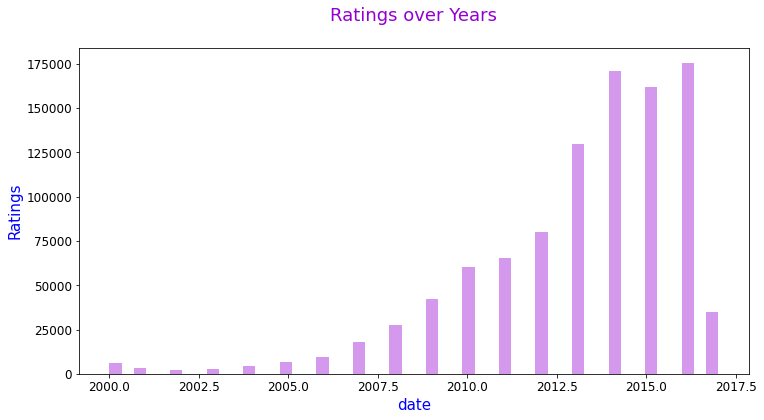

In [11]:
# Coverting the date attribute to years only
Date = SPdata['date'].apply(lambda x: pd.to_numeric(x[-4:]))
Date = Date[Date>=2000]    # This is due to we didn't find enough ratings below 2000.

# Plotting Distribution for ratings over years
print('\033[1mPlot Showing Distribution for ratings over years:-')
plt.figure(figsize=(12,6))
plt.title('Ratings over Years\n')
plt.ylabel('Ratings')
sns.distplot(Date,color='#9400D3',kde=False);
plt.show()

***
**Key Observations:-**
* Here we considered above 2000 date. Since there is no rating system introduced below 2000.
* We can observe maximum reviews over 2014 to 2016.
***


### Ratings from varius Countries

Plot Showing Countrywise Ratings:-


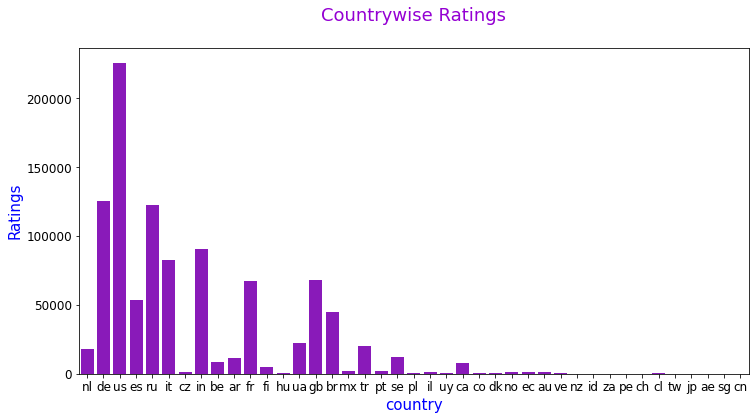

In [12]:
# Plotting Countrywise Ratings
print('\033[1mPlot Showing Countrywise Ratings:-')
plt.figure(figsize=(12,6))
plt.title('Countrywise Ratings\n')
sns.countplot(SPdata['country'],color='#9400D3');
plt.ylabel('Ratings')
plt.show()

***
**Key Observations:-**
* US contry contributed more on ratings. It is possible that highest sales would be in us.
***

### Ratings based on Scores

Plot Showing Ratings based on Scores:-


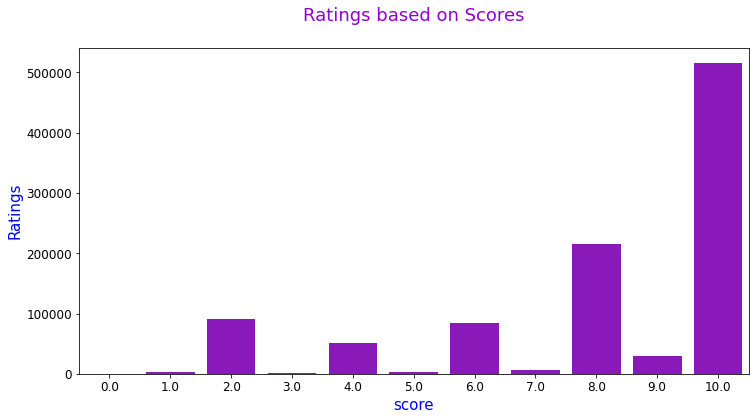

In [13]:
# Plotting Ratings based on Scores
print('\033[1mPlot Showing Ratings based on Scores:-')
plt.figure(figsize=(12,6))
plt.title('Ratings based on Scores\n')
sns.countplot(SPdata['score'],color='#9400D3');
plt.ylabel('Ratings')
plt.show()

***
**Key Observations:-**
* Most of the users rated 10/10.
* By observing above graph we can say that user is interested more in even numbers, which means he rated the product in even numbers most of the times.
***

### <span style="color:#9400D3">* Drop irrelevant features. Keep features like Author, Product, and Score.
    
* We will drop 'phone_url', 'date', 'lang', 'domain', 'score_max', 'extract','country','source' attributes.
* 'phones url' will not be helpful for our futher process.
* 'date' will not give much info about the trends.
* 'source' will be dropped since we dont consider the source in our further process.
* 'language' and 'country' will be dropped since we are considering the country attribute which is enough.
* Same as aboves applies for 'domain' attribute, as we are considering source attribute.
* 'extract' attribute is the content, so its not much useful.

In [14]:
# Dropping customerID Attribute
SPdata.drop(['phone_url', 'date', 'lang', 'domain', 'score_max', 'extract','country','source'],axis=1,inplace=True)

# Getting Shape and Size of final dataset
SP = SPdata.shape

# Displaying Final Dataset
print('\033[1mDataset consist:-\033[0m\n Number of Rows    =',SP[0],'\n Number of Columns =',SP[1])
display(SPdata.head(10))

Dataset consist:-
 Number of Rows    = 1000000 
 Number of Columns = 3


,score,author,product
1219720,10.0,Steven,Samsung Galaxy S II White
801292,10.0,Sinika90,Samsung Galaxy Express I8730
1158058,10.0,J. Higgins,"Nokia N86 Unlocked Phone with 8 MP Camera, Aut..."
518835,8.0,einem Kunden,"ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Di..."
1307580,9.0,daisy33,enV VX-9900
495188,8.0,TomÃ¡s,"Alcatel Pixi 4 - Smartphone, 5"", 8GB, 3G, Quad..."
784680,10.0,Ferry Ziburts,"HTC One SV Smartphone (10,9 cm (4,3 Zoll) Touc..."
641049,2.0,Jayeshkumar Katariya,Samsung Galaxy Note 2 II N7105 (White) Factory...
824482,8.0,??????????? ??????????,Samsung Galaxy Star GT-S5282
1399133,8.0,siriabella,Siemens S45


***
**Key Observations:-**
* All not so necessary features are dropped.
* Now data has only 5 attributes.
***

## <span style="color:#9400D3">2. Answer the following questions

### <span style="color:#9400D3">* Identify the most rated features.

In [15]:
# Top 10 Most rated product is
print('\033[1mMost Rated Products are:-')
display(SPdata['product'].value_counts().to_frame('Ratings')[:10])

Most Rated Products are:-


,Ratings
"Lenovo Vibe K4 Note (White,16GB)",3710
"Lenovo Vibe K4 Note (Black, 16GB)",3083
"OnePlus 3 (Graphite, 64 GB)",2890
"OnePlus 3 (Soft Gold, 64 GB)",2522
Samsung Galaxy Express I8730,1900
Huawei P8lite zwart / 16 GB,1895
"Lenovo Vibe K5 (Gold, VoLTE update)",1801
Samsung Galaxy S6 zwart / 32 GB,1669
Nokia 5800 XpressMusic,1519
"Lenovo Vibe K5 (Grey, VoLTE update)",1488


***
**Key Observations:-**
* We got Lenovo Vibe K4 Note (White,16GB) as most rated product with 3710 ratings
***

### <span style="color:#9400D3">* Identify the users with most number of reviews.

In [16]:
# Top 10 Users with most number of reviews.
print('\033[1mUsers with most number of reviews are:-')
display(SPdata['author'].value_counts().to_frame('Ratings')[:10])

Users with most number of reviews are:-


,Ratings
Amazon Customer,98350
Cliente Amazon,13653
e-bit,5974
Client d'Amazon,5487
Amazon Kunde,3296
Anonymous,1915
einer Kundin,1890
einem Kunden,1350
unknown,1197
Anonymous,1013


***
**Key Observations:-**
* We displayed top 10 users with highest reviews.
***

### <span style="color:#9400D3">* Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [17]:
# Getting ratings which are greater than 50
pdt =SPdata['product'].value_counts().to_frame('Ratings')
pdt = pdt[pdt['Ratings']>50]['Ratings']
auth =SPdata['author'].value_counts().to_frame('Ratings')
auth = auth[auth['Ratings']>50]['Ratings']

# Getting final data based on above condition
data = SPdata[SPdata['author'].isin(auth.index)&SPdata['product'].isin(pdt.index)]

# Displaying Final Dataset
D = data.shape
print('\033[1mDataset consist:-\033[0m\n Number of Rows    =',D[0],'\n Number of Columns =',D[1])
display(data.head(10))

Dataset consist:-
 Number of Rows    = 129172 
 Number of Columns = 3


,score,author,product
1219720,10.0,Steven,Samsung Galaxy S II White
518835,8.0,einem Kunden,"ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Di..."
621237,10.0,Amazon Customer,"Micromax YU YU Yureka Plus,(Moondust Grey)"
423980,8.0,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)"
1056716,6.0,Amazon-Kunde,"Sony Ericsson Xperia mini pro Smartphone (7,6 ..."
360493,2.0,Amazon Customer,"Motorola Moto G, 4th Gen (White, 16GB) - Andro..."
870782,10.0,??????????,Sony Xperia E dual (???????????)
711025,4.0,ÐÐ¸Ñ Ð°Ð¸Ð»,Samsung I9082 Galaxy Grand Duos (Ð±ÐµÐ»ÑÐ¹)
486849,10.0,Amazon Customer,"Mi 4i (Grey, 16GB)"
577721,10.0,Amazon Customer,Sony Xperia Z1 (Black)


***
**Key Observations:-**
* We got the data with products having more than 50 ratings and users who have given more than 50 ratings.
* The new dataset has 129172 rows which are ratings based on giving condition.
***

## <span style="color:#9400D3">3. Build a popularity based model and recommend top 5 mobile phones.

In [18]:
# Getting products which are rated 8 and above
prdt = data[data['score']>=8]

# Getting top 5 mobile phones based on popularity
top5 = prdt['product'].value_counts()[:5]
top5 = top5.to_frame('Total Ratings')
top5['Ratings']=''
x=0
for i in top5.index:
    top5['Ratings'][x] = data[data['product']==i]['score'].max()
    x+=1
print('\033[1mTop 5 Mobile Phones based on Popularity are:-')
display(top5)

Top 5 Mobile Phones based on Popularity are:-


,Total Ratings,Ratings
"Lenovo Vibe K4 Note (White,16GB)",1320,10
"Lenovo Vibe K4 Note (Black, 16GB)",1104,10
"OnePlus 3 (Graphite, 64 GB)",1081,10
"OnePlus 3 (Soft Gold, 64 GB)",971,10
"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)",652,10


***
**Key Observations:-**
* We got top 5 Mobile Phones based on Popularity.
* Even though I considered the ratings over 8, the resulted product rates are 10 only.
***

## <span style="color:#9400D3">4. Build a Collaborative Filtering Model using SVD.

### Re-arranging the Columns & Limiting the data to 5000 samples.

In [19]:
# Re-arranging columns in proper format
clm = ['author','product','score']
data = data.reindex(columns=clm)

# Limiting the data to 5000 data samples.
MPdata = data.sample(n=5000, random_state=612)

***
**Key Observations:-**
* We re-arraged the columns to a proper format.
* We keep only 5000 samples here.
***

### Loading Data from Dataframe and Splitting the data to train and test data

In [20]:
# Loading Data from Dataset
Rdr = Reader(rating_scale=(1, 10))
Data = Dataset.load_from_df(MPdata, reader = Rdr)

# Splitting the data
train, test = train_test_split(Data)

***
**Key Observations:-**
* Here we laoded our dataset, and splitted to train and test data.
***

### Building Collaborative Filtering Model using SVD.

In [21]:
# Building Collaborative Filtering Model using SVD
model = SVD()
model.fit(train)

# Getting Predictions
Pred = model.test(test)

***
**Key Observations:-**
* Collaborative Filtering Model is built using SVD.
* Predictions were captured.
***

## <span style="color:#9400D3">5. Evaluate the Collaborative Model. Print RMSE value.

In [22]:
# Getting RMSE value
print('\033[1mRMSE value of SVD model test data:-')
display(a = accuracy.rmse(Pred))

RMSE value of SVD model test data:-
RMSE: 2.8325


***
**Key Observations:-**
* We got the RMSE value.
***

## <span style="color:#9400D3">6. Predict score (average rating) for test users.

In [23]:
# Predicting score (average rating) for test users
display(Pred)

[Prediction(uid='Anonymous ', iid='Samsung Galaxy S6 active 32GB (AT&T)', r_ui=10.0, est=8.800849844421778, details={'was_impossible': False}),
 Prediction(uid='Ð\x94Ð¼Ð¸Ñ\x82Ñ\x80Ð¸Ð¹', iid='Nokia 101 Premium Black', r_ui=10.0, est=8.423129481134728, details={'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Samsung Galaxy Ace II GT-I8160', r_ui=2.0, est=7.114925600665859, details={'was_impossible': False}),
 Prediction(uid='Elisa', iid='BLU Life Pure Mini Quad Band Unlocked (Black)', r_ui=10.0, est=8.083241337235084, details={'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='BLU VIVO 5R Refresh Smartphone - 5.5-Inch Display 4G LTE GSM Unlocked, GOLD', r_ui=10.0, est=9.2968441549545, details={'was_impossible': False}),
 Prediction(uid='Ð\x94ÐµÐ½Ð¸Ñ\x81', iid='Sony Xperia Z1 (Ñ\x84Ð¸Ð¾Ð»ÐµÑ\x82Ð¾Ð²Ñ\x8bÐ¹)', r_ui=9.0, est=8.73044565626194, details={'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Samsung Star II DUOS GT-C6712', r_ui=2

***
**Key Observations:-**
* Predicted the score for test users.
***

## <span style="color:#9400D3">7. Report your findings and inferences.

* In our data we had missing values, we filled those missing values by most common values in the data.
* 6478 duplicate rows are found and removed later. Then we dropped irrelevant columns.
* In insigths we observed that maximum reviews are given in the years 2014 to 2016.
* Users from US country had given highest number of reviews.
* Maximum users rated 10/10 for the mobile phones.
* Then we found most rated features and users with most number of reviews.
* 'Lenovo Vibe K4 Note (White,16GB)' is the most rated mobile phone.
* 'Amazon Customer' is user with most number of reviews.
* We also found data with products having more than 50 ratings and users who have given more than 50 ratings.
* After that we built a popularity based model and recommended top 5 mobile phones based on popularity.(We keep ratings 8 & above)
* 'Lenovo Vibe K4 Note (White,16GB)' most popular mobile phone with 10/10 maximum rating.
* By taking 5000 samples we built a collaborative filtering model using SVD and predictions were made accordingly.

***
**Key Observations:-**
* We reported all the process untill now.
***

## <span style="color:#9400D3">8. Try and Recommend top 5 products for test users.

### Unpacking Test Data

In [24]:
# Creating a new dataframe
Test = pd.DataFrame(columns= ['author','product','score'])

# Unpacking our test data and appending the data to dataframe
for i in test:
    Test.loc[len(Test.index)] = i

# Displaying test data
display(Test.head())

,author,product,score
0,Anonymous,Samsung Galaxy S6 active 32GB (AT&T),10.0
1,ÐÐ¼Ð¸ÑÑÐ¸Ð¹,Nokia 101 Premium Black,10.0
2,Amazon Customer,Samsung Galaxy Ace II GT-I8160,2.0
3,Elisa,BLU Life Pure Mini Quad Band Unlocked (Black),10.0
4,Amazon Customer,BLU VIVO 5R Refresh Smartphone - 5.5-Inch Disp...,10.0


***
**Key Observations:-**
* We have our test dataset ready.
***

### Recommending top 5 products for test users

In [25]:
# Getting products which are rated 8 and above
prdt = Test[Test['score']>=8]

# Getting top 5 mobile phones based on popularity
top5 = prdt['product'].value_counts()[:5]
top5 = top5.to_frame('Total Ratings')
top5['Ratings']=''
x=0
for i in top5.index:
    top5['Ratings'][x] = Test[Test['product']==i]['score'].max()
    x+=1
print('\033[1mTop 5 Mobile Phones recommended are:-')
display(top5)

Top 5 Mobile Phones recommended are:-


,Total Ratings,Ratings
"Lenovo Vibe K4 Note (White,16GB)",10,10
"Lenovo Vibe K5 (Grey, VoLTE update)",9,10
"OnePlus 3 (Soft Gold, 64 GB)",9,10
"Mi Xiaomi Mi Max (Gold, 32GB)",8,10
"Lenovo Vibe K4 Note (Black, 16GB)",7,10


***
**Key Observations:-**
* We got top 5 mobile phones for test users.
* 'Lenovo Vibe K4 Note (Black, 16GB)' is at the top.
***

## <span style="color:#9400D3">9. Try Cross Validation techniques to get better results.

In [26]:
# Using Cross Validation techniques
display(cross_validate(model,Data, measures=['RMSE'], cv=3, verbose=False))

{'test_rmse': array([2.78401792, 2.84948561, 2.76631159]),
 'fit_time': (0.19767093658447266, 0.18745064735412598, 0.17183232307434082),
 'test_time': (0.0, 0.0, 0.0)}

***
**Key Observations:-**
* We can see improvement results here.
***

## <span style="color:#9400D3">10. In what business scenario you should use popularity based Recommendation Systems ?

* Popularity based recommendation system works with the trend. 
* This system takes the trendy products. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.
* The purpose of a recommendation system basically is to search for content that would be interesting to an individual. 
* Another objective of the recommendation system is to achieve customer loyalty by providing relevant content and maximising the time spent by a user on your website or channel. This also helps in increasing customer engagement.
* Recommendation systems are important and valuable tools for companies like Amazon and Netflix, who are both known for their personalized customer experiences.
* These companies collects and analyzes demographic data from customers and adds it to information from previous purchases, product ratings, and user behavior.

## <span style="color:#9400D3">11. In what business scenario you should use CF based Recommendation Systems ?

* Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users.
* Most websites like Amazon, YouTube, and Netflix use collaborative filtering as a part of their sophisticated recommendation systems.
* Collaborative filtering works around the interactions that users have with items. These interactions can help find patterns that the data about the items or users itself can’t.
* Collaborative Filtering provides strong predictive power for recommender systems, and requires the least information at the same time.

## <span style="color:#9400D3">12. What other possible methods can you think of which can further improve the recommendation for different users ?

### Item-based Collaborative Filtering
* Item-based CF, developed by Amazon in the year 1998 plays an important role in its success. The basic idea behind this technique is to look for similar items based on items users have already rated/consumed.
* Earlier collaborative filtering systems based on rating similarity between users (known as user-user collaborative filtering) had several problems:
  * Systems performed poorly when they had many items but comparatively few ratings.
  * Computing similarities between all pairs of users was expensive.
  * User profiles changed quickly and the entire system model had to be recomputed.
* Item-item models resolve these problems in systems that have more users than items. 
* Item-item models use rating distributions per item, not per user. With more users than items, each item tends to have more ratings than each user, so an item's average rating usually doesn't change quickly.
* This leads to more stable rating distributions in the model, so the model doesn't have to be rebuilt as often. 
* When users consume and then rate an item, that item's similar items are picked from the existing system model and added to the user's recommendations.

# <span style="color:#9400D3">--------------------- End of AIML MODULE PROJECT 6 ---------------------
  
------------------------------------------------------------------------------**THANK YOU😊**----------------------------------------------------------------------------------

In [27]:
!jupyter nbconvert --to html AIML_MODULE_PROJECT_6.ipynb

[NbConvertApp] Converting notebook AIML_MODULE_PROJECT_6.ipynb to html
[NbConvertApp] Writing 922088 bytes to AIML_MODULE_PROJECT_6.html
